## Dragon Real Estates

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import sklearn

In [2]:
#BAtch Learning or Online Learning
#already data availbale
#seleccting Performance
#RMSE
#Checking the Assumpitions
housing=pd.read_csv("realestate.csv")


In [3]:
 housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PIRATIO,B,LSTAT,MLDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DES      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MLDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PIRATIO,B,LSTAT,MLDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

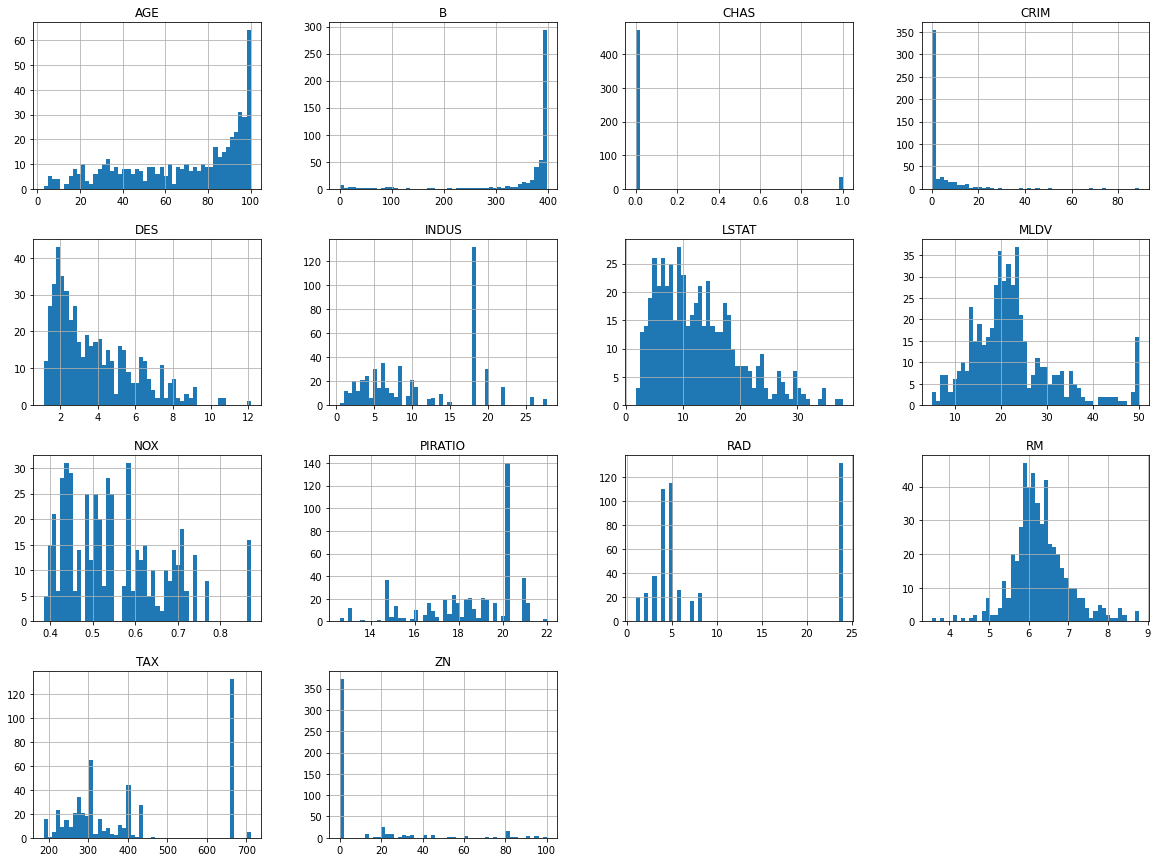

In [10]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# #Train Test splitting

In [11]:
'''#np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    
    test_set_size= int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]'''
'''train_set,test_set =split_train_test(housing,0.2)'''
#print(f"Rows in train set: {len(train_set)}\nRows in test test:{len(test_set)}\n")

'train_set,test_set =split_train_test(housing,0.2)'

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test test:{len(test_set)}\n")

Rows in train set: 404
Rows in test test:102



In [13]:
#Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
#95/7 #376/28

##Looking for Correlations

In [17]:
corr_matrix=housing.corr()
corr_matrix['MLDV'].sort_values(ascending=False)

MLDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DES        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PIRATIO   -0.507787
LSTAT     -0.737663
Name: MLDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CAC326C10>,
      dtype=object)

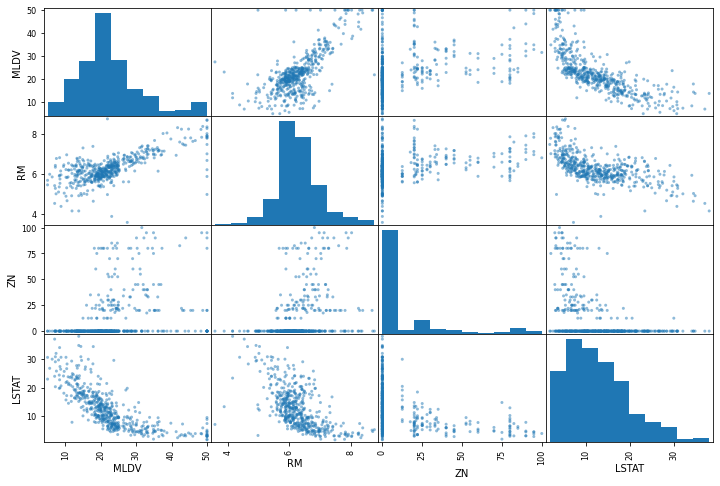

In [18]:
from pandas.plotting import scatter_matrix
attributes=["MLDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=[12,8])


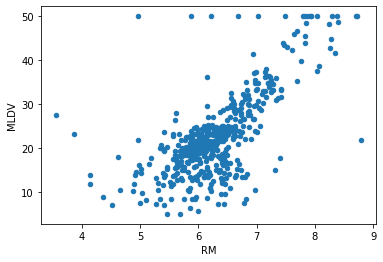

In [19]:
housing.plot(kind="scatter",x="RM",y="MLDV")

## Trying Out Attributions

In [20]:
housing["TAXRM"]= housing["TAX"]/housing["RM"]

In [21]:
housing["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [22]:
corr_matrix=housing.corr()
corr_matrix['MLDV'].sort_values(ascending=False)

MLDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DES        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PIRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MLDV, dtype: float64

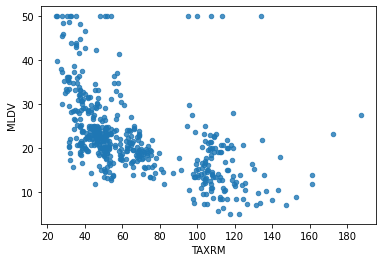

In [23]:
housing.plot(kind="scatter",x="TAXRM",y="MLDV",alpha=0.8)

In [24]:
housing=strat_train_set.drop("MLDV",axis=1)
housing_labels=strat_train_set["MLDV"].copy()

In [25]:
a=housing.dropna(subset=["RM"])
a.shape

(404, 13)

In [26]:
housing.drop("RM",axis=1).shape

(404, 12)

In [27]:
#option 3
median=housing["RM"].median()

In [28]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [32]:
x=imputer.transform(housing)

In [33]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PIRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Design Sckit learn

#primarily ,three type of objects


## Feature Scaling


Primarily Two types


##PIPELINE 

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [36]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [38]:
housing_num_tr.shape

(404, 13)

## Selecti ng a Desitred model for Dragon Real Estates

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model =RandomForestRegressor()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [40]:
some_data=housing.iloc[:5]

In [41]:
some_labels=housing_labels.iloc[:5]

In [42]:
prepared_data=my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([22.488, 25.988, 16.533, 23.278, 23.523])

In [44]:
list(some_labels)




[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating Model

In [45]:
#RMSE
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [46]:
rmse   #Overfitting ho gaya

1.2273762616344515

# USing better evaluation-Cross validation

1 2 3 4 5 6 7 8 8 10

In [47]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [48]:
rmse_scores

array([2.88497148, 2.73009557, 4.43451113, 2.5216472 , 3.61344482,
       2.57770935, 4.81516438, 3.31487468, 3.4505306 , 3.20401074])

In [49]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [50]:
print_scores(rmse_scores)

Scores: [2.88497148 2.73009557 4.43451113 2.5216472  3.61344482 2.57770935
 4.81516438 3.31487468 3.4505306  3.20401074]
Mean: 3.3546959940969274
Standard Deviation: 0.7285493121112896


Quiz:Conver this notebook into python file with pipeline in vs

In [51]:
from joblib import dump,load
dump(model,'Dragon.joblib') 

['Dragon.joblib']

# Saving the model

# Testing Model

In [52]:
X_test=strat_test_set.drop("MLDV",axis=1)
Y_test=strat_test_set["MLDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)

final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

In [53]:
final_rmse

3.0001607277205746

In [54]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28660512,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [56]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -11.44141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

model.predict(features)

array([21.864])